In [1]:
from functions import *

import cartopy.crs as crs
from netCDF4 import Dataset
import xarray as xr
from scipy.interpolate import griddata
from sklearn.cluster import KMeans

from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)

import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap, ScalarMappable
from matplotlib.colors import Normalize

states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_0_boundary_lines_land")
cart_proj = crs.PlateCarree()

## Study of CMEMS data around 05-17-2005

In [29]:
dates = ["2005-05-" + str(i) for i in range(14, 22)]
lons, lats, chl, temp, bath = data_extractor(date = dates)
chl, temp = bathymetry_filter(chl, bath), bathymetry_filter(temp, bath)
chl_CMEMS, temp_CMEMS = np.nanmean(chl, axis = 0), np.nanmean(temp, axis = 0)
chl_norm, temp_norm = anomalies(chl), anomalies(temp)

C:\Users\feder\AppData\Local\Temp\ipykernel_13992\1861236644.py:4: RuntimeWarning: Mean of empty slice
  chl_CMEMS, temp_CMEMS = np.nanmean(chl, axis = 0), np.nanmean(temp, axis = 0)


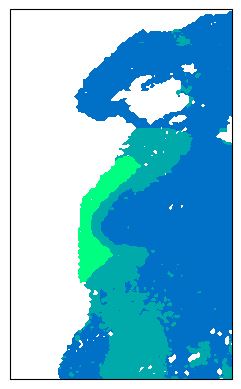

In [30]:
fig, ax = plt.subplots(subplot_kw = dict(projection = cart_proj))

cmap = get_cmap("winter", 10)
norm = Normalize(0, 0.15)

ax.contourf(lons, lats, chl_CMEMS, cmap = cmap, norm = norm)

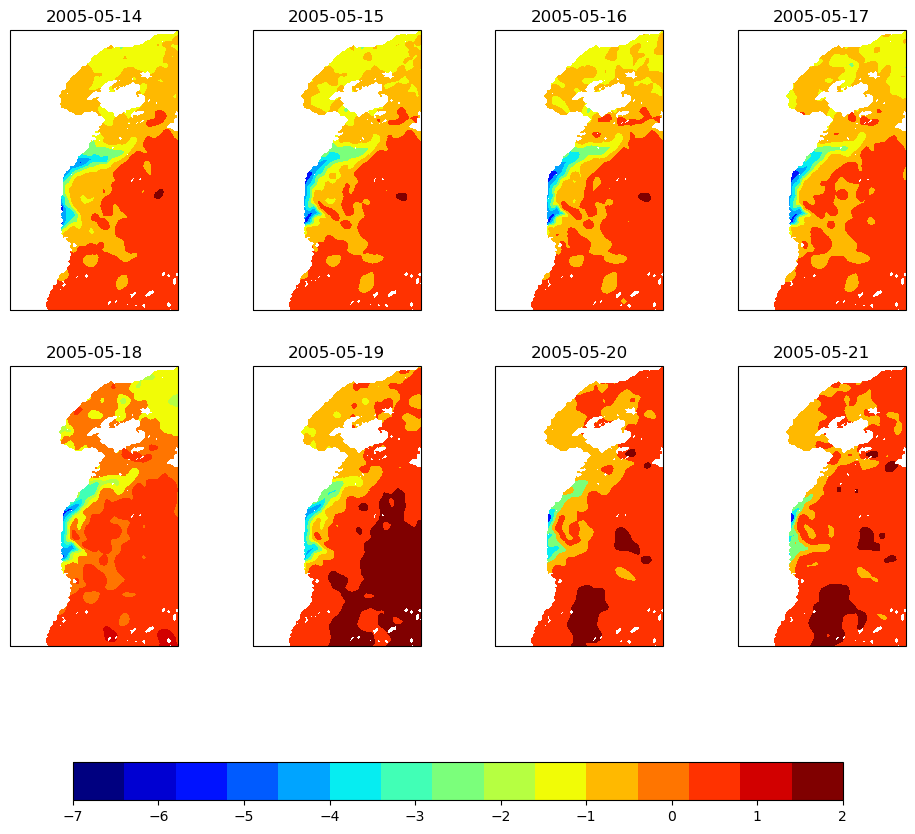

In [39]:
fig, axs = plt.subplots(nrows = 2, ncols = 4, subplot_kw = dict(projection = cart_proj),
                       figsize = [12,10])

axs = axs.ravel()
cmap = get_cmap("jet", 15)
norm = Normalize(vmin = -7, vmax = 2)

for (i, t) in enumerate(temp_norm):
    axs[i].contourf(lons, lats, t, cmap = cmap, norm = norm)
    axs[i].set_title(dates[i])
    
fig.colorbar(mappable = ScalarMappable(cmap = cmap, norm = norm), ax = axs.tolist(), orientation = "horizontal", fraction = 0.05)

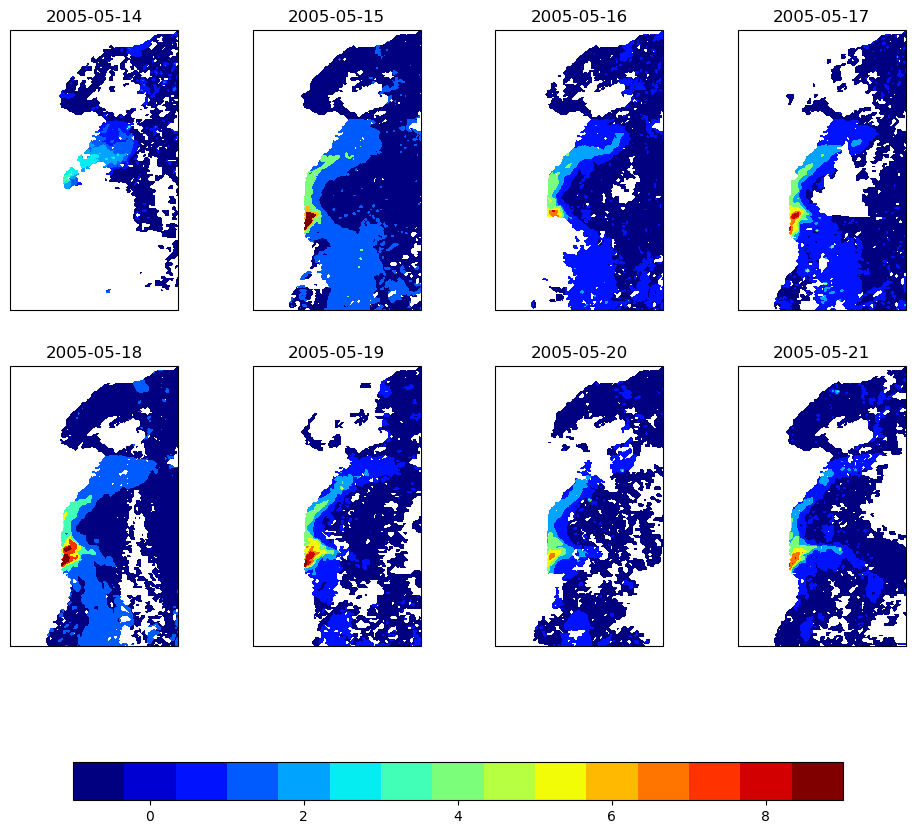

In [33]:
fig, axs = plt.subplots(nrows = 2, ncols = 4, subplot_kw = dict(projection = cart_proj),
                       figsize = [12,10])

axs = axs.ravel()
cmap = get_cmap("jet", 15)
norm = Normalize(vmin = -1, vmax = 9)

for (i, c) in enumerate(chl_norm):
    axs[i].contourf(lons, lats, c, cmap = cmap, norm = norm)
    axs[i].set_title(dates[i])
    
fig.colorbar(mappable = ScalarMappable(cmap = cmap, norm = norm), ax = axs.tolist(), orientation = "horizontal", fraction = 0.05)

## 8-day average MODIS

In [ ]:
MODIS_data = xr.open_dataset("../data/SCS/MODIS_8Dchl.nc")
bath = xr.open_dataset("../data/SCS/bathymetry.nc")

In [23]:
bath = xr.open_dataset("../data/SCS/bathymetry.nc")
chl = MODIS_data.chlor_a.interp(lon = lons, lat = lats, method = "nearest")
bath = bath.elevation.interp(lon = lons, lat = lats, method = "nearest").to_numpy()
bath[np.isnan(bath)] = 0

chl_MODIS = bathymetry_filter(chl, bath)
chl_norm = anomalies(chl_MODIS)
temp_norm = anomalies(temp_CMEMS)

In [24]:
chl_norm.shape

(201, 121)

In [25]:
labels_matrix = cluster_data(chl_norm, temp_norm)

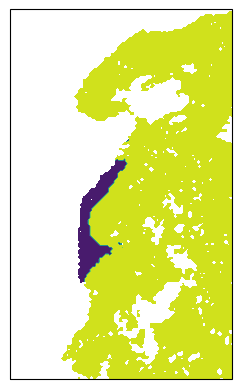

In [26]:
fig, ax = plt.subplots(subplot_kw = dict(projection = cart_proj))

ax.contourf(lons, lats, labels_matrix)

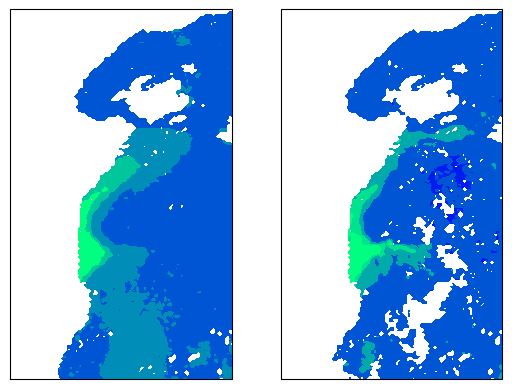

In [27]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, subplot_kw = dict(projection = cart_proj))

cmap = get_cmap("winter", 10)
norm = Normalize(0, 0.2)
for i in range(2):
    if i == 0:
        chl = chl_CMEMS
    else:
        chl = chl_MODIS
    axs[i].contourf(lons, lats, chl, cmap = cmap, norm = norm)
    